In [1]:
import numpy as np
import lusee_sky
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import gaussian_filter as gfilt
from numpy.fft import rfft
d

In [2]:
data=np.load('waterfalls/wfall_1.0_50.0_0.25_3.0_30.0.npz',allow_pickle=True)
wf=data['wfall']
freqs=data['freq']


In [3]:
wf[0].shape,freqs.shape, freqs[195]

((1332, 196), (196,), 49.75)

In [4]:
def normed_ps(data):
    ps = np.abs(rfft(data)**2)
    ps /= ps[-1]
    return ps

def plot_dPdt(wfndx, freq=20.0):
    freqndx = np.where(freqs==freq)[0][0]
    da = wf[wfndx]
    der = (da[2:,freqndx]-da[:-2,freqndx])/(da[1:-1,freqndx])/(2*15*60) #two sided derivative with 15s record
    x = np.arange(len(der))*0.25
    plt.plot(x,der*1e6,label='%i MHz'%(freq))
    

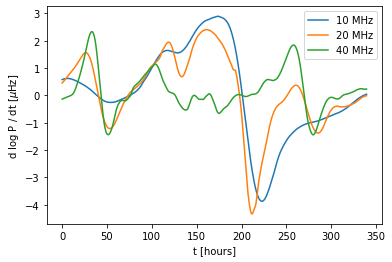

In [5]:
plot_dPdt(1,10.0)
plot_dPdt(1,20.0)
plot_dPdt(1,40.0)
plt.legend()
plt.xlabel('t [hours]')
plt.ylabel('d log P / dt [$\mu$Hz]')
plt.savefig ('dpdt.pdf')